# Загрузка данных

Скачиваем необходимые данные с Google Drive

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=12UNNxWzKJ0RmQxaQp3acMHvXl7pKWv-N' -O main_data.csv -q

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1TG4UrcjWGHl9g-sBbMSXF-VPHPYITowO' -O new_data.csv -q


Загружаем бибилотеки, которые могут пригодиться

In [ ]:
# Импорт библиотек

import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from math import sqrt

from joblib import dump

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

# Анализ данных

Смотрим содержимое датасета

In [ ]:
# Датафрейм
df = pd.read_csv('main_data.csv')

# Размер датафрейма
print(df.shape)

#Содержимое
df.head()



(5978, 26)


,region,address,price,total_area,kitchen_area,living_area,rooms_count,floor,floors_number,build_date,isСomplete,complitation_year,house_material,parking,decoration,balcony,longitude,latitude,passenger_elevator,cargo_elevator,metro,metro_distance,metro_transport,district,is_apartments,is_auction
0,msk,"Москва, Большой Толмачёвский переулок",1996610000,459.4,81.4,173.3,5.0,7,8,NaN,0.0,2024.0,monolith,underground,NaN,4.0,37.620949,55.739757,1.0,1.0,"Полянка,Новокузнецкая,Третьяковская","6,10,4","walk,walk,transport","Якиманка,ЦАО",0.0,0
1,msk,"Москва, Самотечная ул., 5",66970000,160.0,25.0,119.0,3.0,3,9,1892.0,NaN,NaN,brick,underground,NaN,0.0,37.618318,55.775165,1.0,1.0,"Цветной бульвар,Достоевская,Сухаревская","6,9,13","walk,walk,walk","Тверской,ЦАО",NaN,1
2,msk,"Москва, Ильинка",378820000,157.4,41.1,50.7,3.0,3,5,NaN,0.0,2024.0,monolith,NaN,NaN,NaN,37.623649,55.755140,NaN,NaN,"Площадь Революции,Театральная","3,6","walk,walk","Тверской,ЦАО",0.0,0
3,msk,"Москва, М. Бронная ул., 32",110500000,110.5,15.0,61.0,3.0,2,6,1912.0,NaN,NaN,brick,ground,NaN,0.0,37.593524,55.764197,1.0,0.0,"Маяковская,Пушкинская,Тверская","10,10,10","walk,walk,walk","Пресненский,ЦАО",NaN,1
4,msk,"Москва, Ильинка",1031300000,271.8,57.1,123.8,5.0,5,5,NaN,0.0,2024.0,monolith,NaN,NaN,NaN,37.623509,55.755201,NaN,NaN,"Площадь Революции,Театральная","3,6","walk,walk","Тверской,ЦАО",0.0,0


## Новый датасет

In [ ]:
# Датафрейм
df1 = pd.read_csv('new_data.csv', sep = ";")

# Размер датафрейма
print(df1.shape)

#Содержимое
df1.head()

(55, 24)


,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Sminex,developer,https://www.cian.ru/sale/flat/297972141/,Москва,sale,flat,2,5,2,88.5,196080000,2024,-1,"Монолитно-кирпичный, монолитный",-1,Без отделки,"34,2 м²","30,5 м²",74951347302,Тверской,NaN,NaN,Площадь Революции,Ильинка 3/8 ЖК
1,КомСервис,real_estate_agent,https://www.cian.ru/sale/flat/285925205/,Москва,sale,flat,4,9,2,75.3,135540000,2023,-1,-1,-1,-1,-1,-1,79660503775,Хамовники,2-й Неопалимовский переулок,3,Парк Культуры,Клубный особняк High Garden
2,Sminex,developer,https://www.cian.ru/sale/flat/293713880/,Москва,sale,flat,2,14,2,85.6,156750000,2024,-1,Монолитный,-1,Без отделки,"34,6 м²","15,5 м²",74951375467,Якиманка,NaN,NaN,Новокузнецкая,Лаврушинский ЖК
3,Intermark Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/297935793/,Москва,sale,flat,3,5,2,52.0,39000000,1956,-1,-1,-1,-1,29 м²,6 м²,79660548486,Донской,4-й Верхний Михайловский проезд,4к1,Шаболовская,NaN
4,Regions Development,developer,https://www.cian.ru/sale/flat/299533808/,Москва,sale,flat,2,23,2,72.1,30222250,2023,-1,Монолитный,-1,Без отделки,-1,-1,74951379034,Нагатинский затон,NaN,NaN,Технопарк,Дрим Тауэрс ЖК


## Разведочный анализ данных

Кроткое описание полей:  
их тип  
количество не нуливых полей

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5978 entries, 0 to 5977
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region              5978 non-null   object 
 1   address             5978 non-null   object 
 2   price               5978 non-null   int64  
 3   total_area          5978 non-null   float64
 4   kitchen_area        3702 non-null   float64
 5   living_area         3834 non-null   float64
 6   rooms_count         5248 non-null   float64
 7   floor               5978 non-null   int64  
 8   floors_number       5978 non-null   int64  
 9   build_date          1497 non-null   float64
 10  isСomplete          3797 non-null   float64
 11  complitation_year   3869 non-null   float64
 12  house_material      5371 non-null   object 
 13  parking             1432 non-null   object 
 14  decoration          1222 non-null   object 
 15  balcony             1405 non-null   float64
 16  longit

In [ ]:
na = dict(df.isna().sum())
na['metro']
sorted(na.items(), key = lambda x: x[1])

[('region', 0),
 ('address', 0),
 ('price', 0),
 ('total_area', 0),
 ('floor', 0),
 ('floors_number', 0),
 ('longitude', 0),
 ('latitude', 0),
 ('is_auction', 0),
 ('district', 17),
 ('house_material', 607),
 ('rooms_count', 730),
 ('metro', 874),
 ('metro_distance', 874),
 ('metro_transport', 874),
 ('is_apartments', 938),
 ('complitation_year', 2109),
 ('living_area', 2144),
 ('isСomplete', 2181),
 ('kitchen_area', 2276),
 ('passenger_elevator', 2724),
 ('cargo_elevator', 3285),
 ('build_date', 4481),
 ('parking', 4546),
 ('balcony', 4573),
 ('decoration', 4756)]

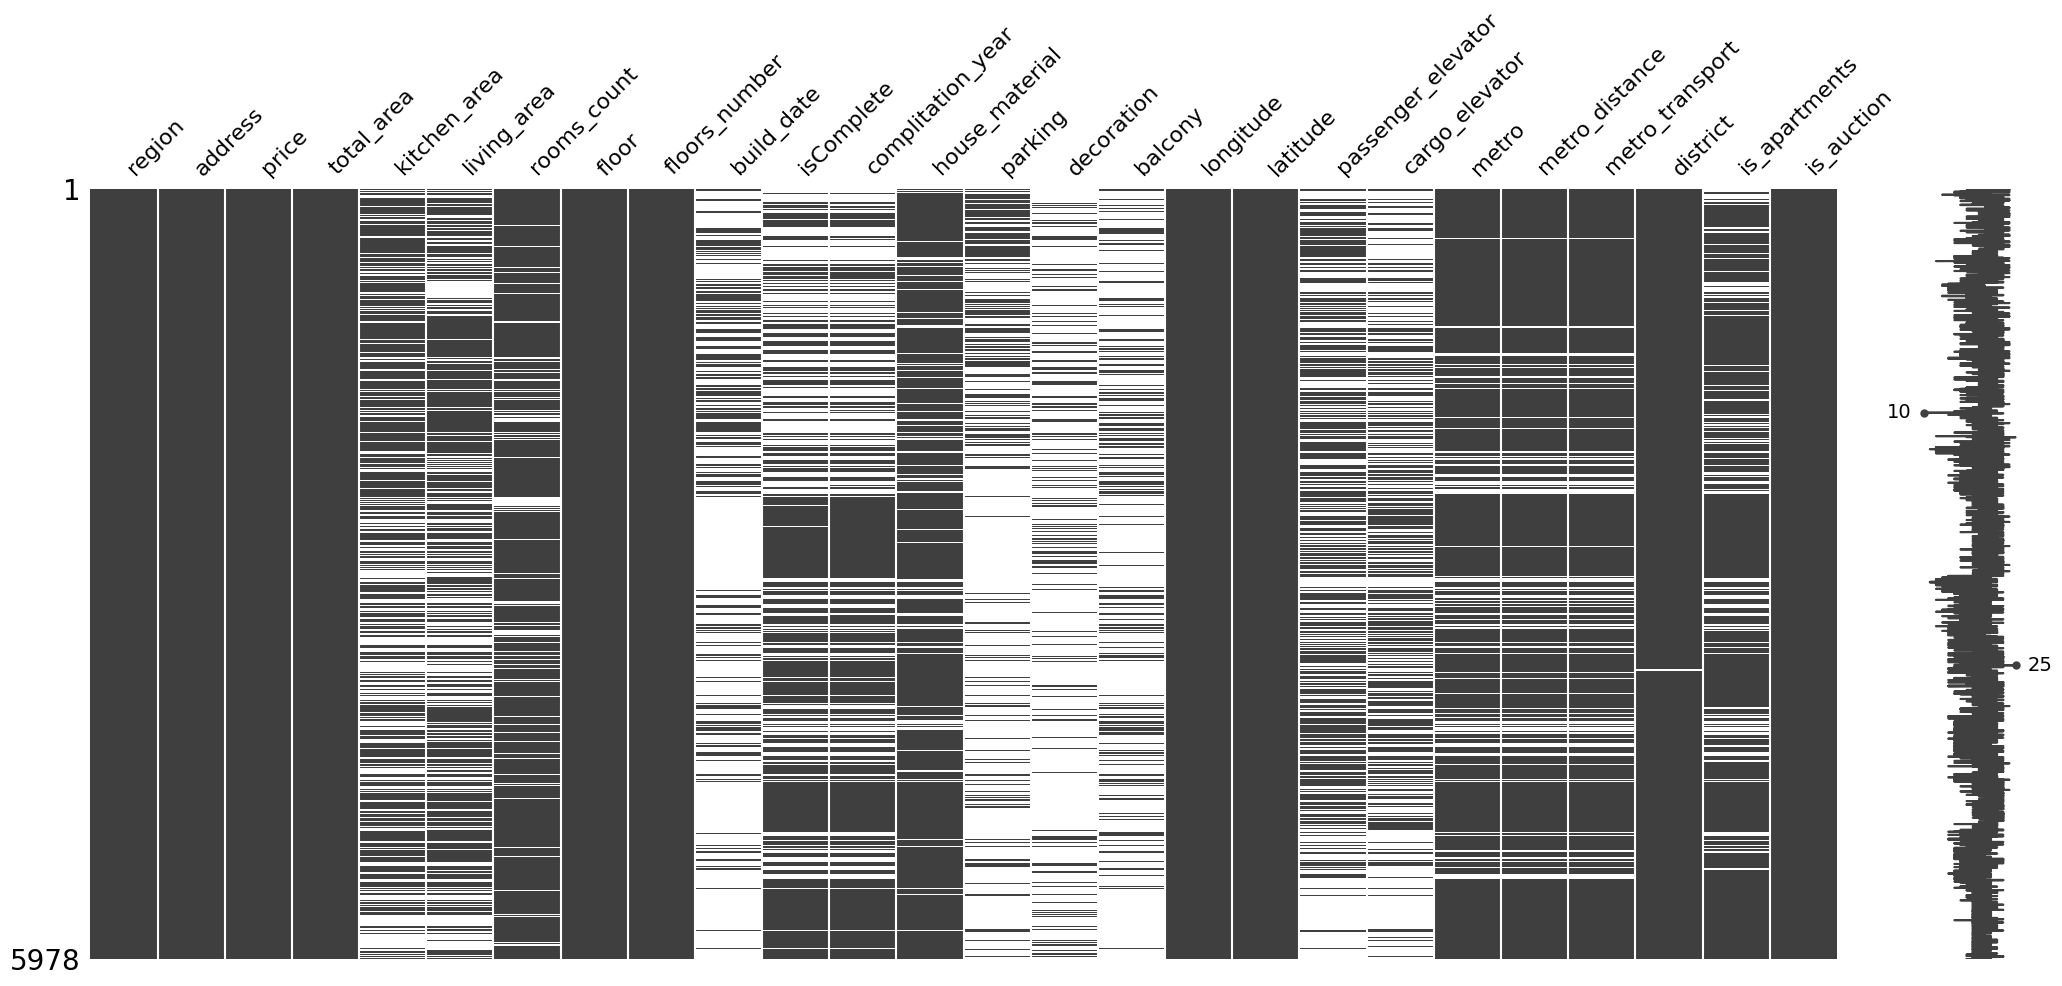

In [ ]:
msno.matrix(df)
plt.show()

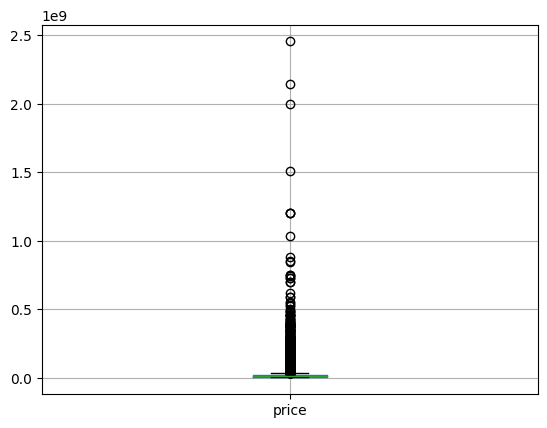

In [ ]:
# Изучим целевую переменную

df.boxplot('price');

In [ ]:
# Обрежем выбросы - оставим только те значения, что попадают в квантиль 0.95

df = df[df.price < df.price.quantile(q=0.95)]
df.shape

(5678, 26)

In [ ]:
print(df.groupby('region')['price'].mean())
print(df.groupby('region')['price'].median())
print(df.groupby('region')['price'].max())
print(df.groupby('region')['price'].min())

region
ekb    7.588197e+06
kzn    1.290546e+07
msk    4.471063e+07
nng    1.171850e+07
nsk    6.846428e+06
spb    1.576570e+07
Name: price, dtype: float64
region
ekb     6790000.0
kzn    10376200.0
msk    36812322.0
nng    10390936.5
nsk     6144830.0
spb     9500000.0
Name: price, dtype: float64
region
ekb     80000000
kzn    115265000
msk    119700000
nng     65598750
nsk     67000000
spb    118000000
Name: price, dtype: int64
region
ekb    1790000
kzn    1800000
msk    3600000
nng    2150000
nsk    1697000
spb    1900000
Name: price, dtype: int64


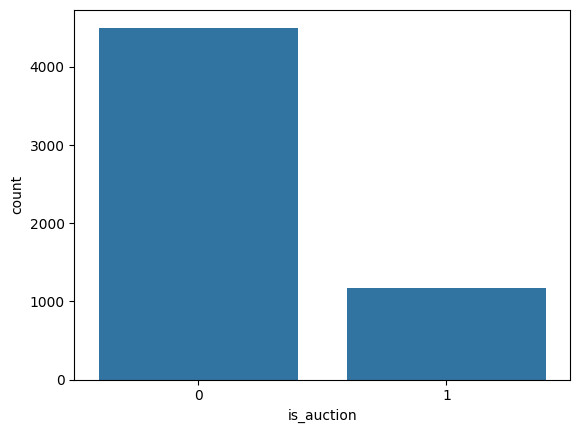

In [ ]:
import matplotlib.pyplot as plotter
sns.countplot(x = df["is_auction"])
plotter.xticks(rotation = 0);

<Axes: >

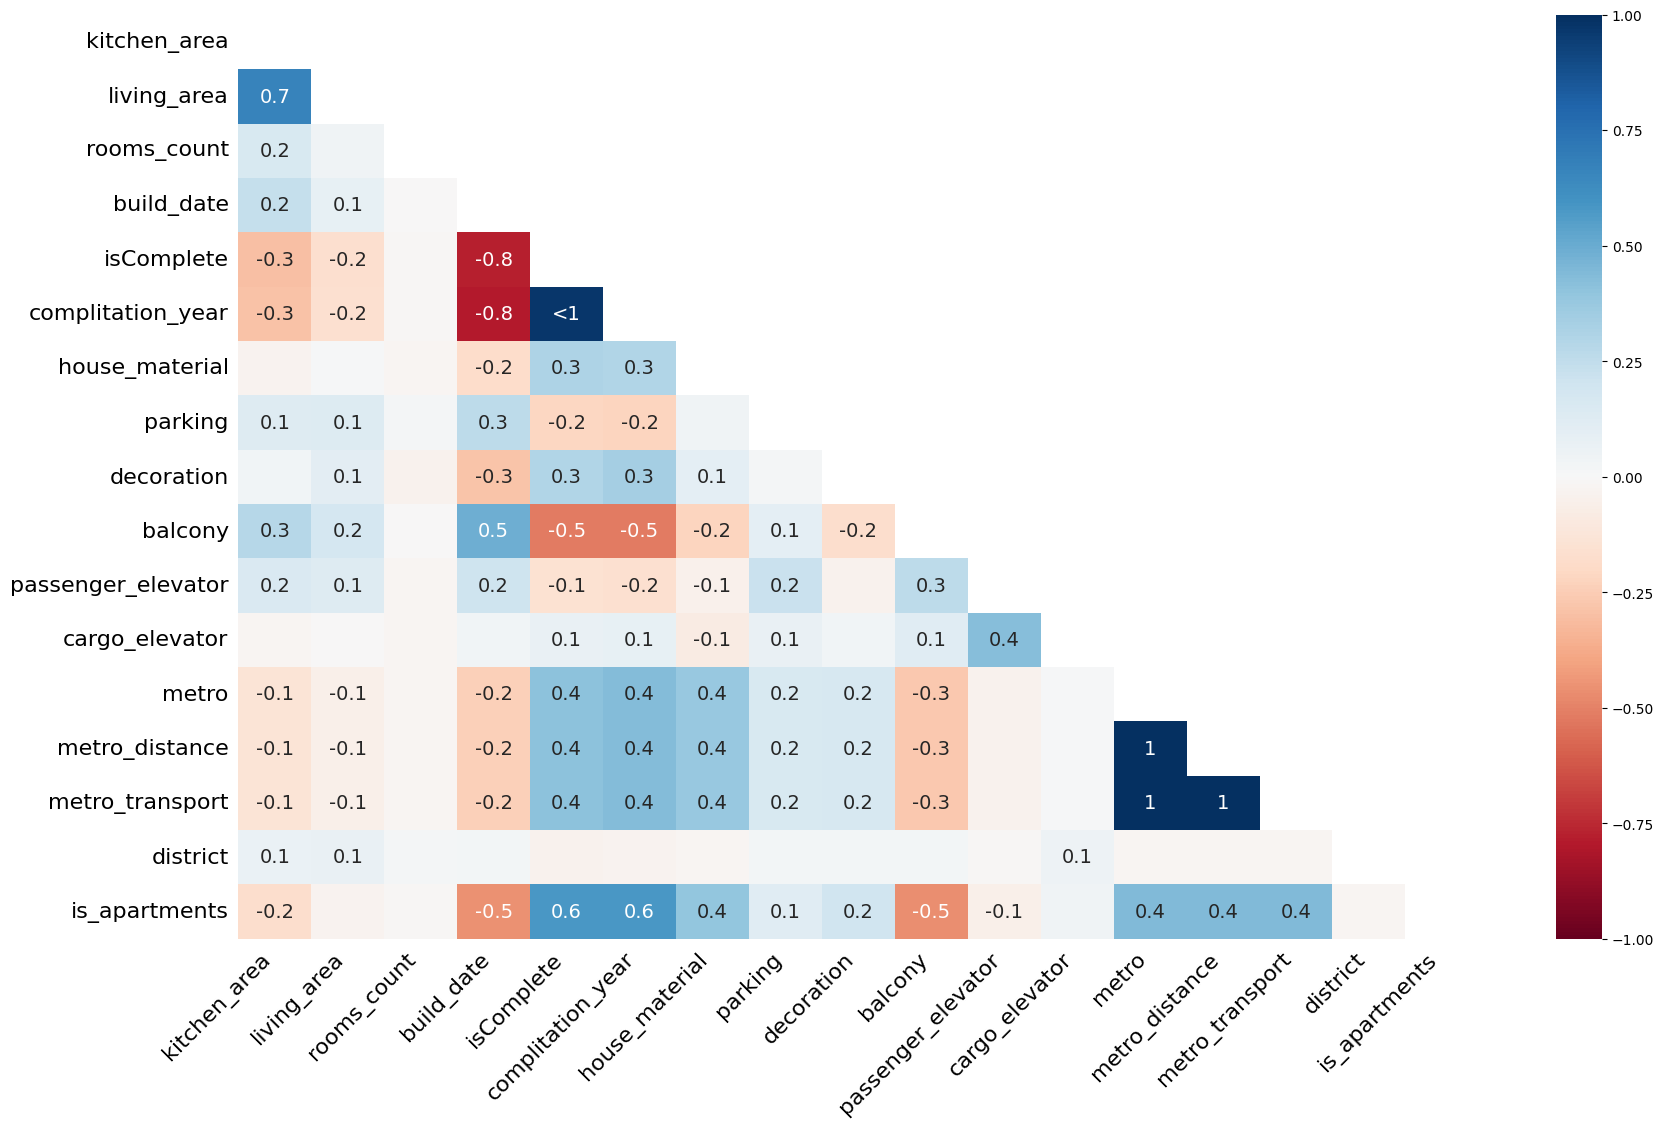

In [ ]:
msno.heatmap(df, labels=True)

In [ ]:
df.columns.tolist()

['region',
 'address',
 'price',
 'total_area',
 'kitchen_area',
 'living_area',
 'rooms_count',
 'floor',
 'floors_number',
 'build_date',
 'isСomplete',
 'complitation_year',
 'house_material',
 'parking',
 'decoration',
 'balcony',
 'longitude',
 'latitude',
 'passenger_elevator',
 'cargo_elevator',
 'metro',
 'metro_distance',
 'metro_transport',
 'district',
 'is_apartments',
 'is_auction']

<ipython-input-56-e6d23b72581d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[selected_columns].corr()


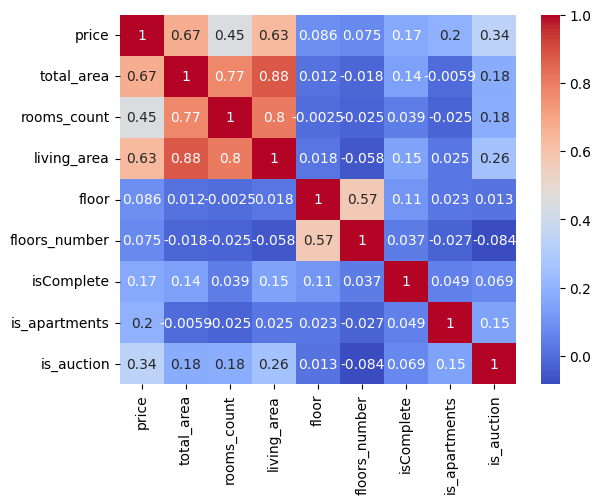

<Figure size 1500x800 with 0 Axes>

In [ ]:
selected_columns = ['price', 'region', 'total_area', 'rooms_count','living_area', 'floor', 'floors_number', 'isСomplete', 'parking', 'metro','metro_distance', 'is_apartments', 'is_auction']
corr_matrix = df[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Отображение тепловой карты

plt.figure(figsize=(15, 8))
plt.show()

In [ ]:
df_msk = df[df['region']=='msk']
df_nsk = df[df['region']=='nsk']
df_spb = df[df['region']=='spb']
df_ekb = df[df['region']=='ekb']
df_kzn = df[df['region']=='kzn']
df_nng = df[df['region']=='nng']

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms_count'}>],
       [<Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_number'}>],
       [<Axes: title={'center': 'isСomplete'}>,
        <Axes: title={'center': 'is_apartments'}>,
        <Axes: title={'center': 'is_auction'}>]], dtype=object)

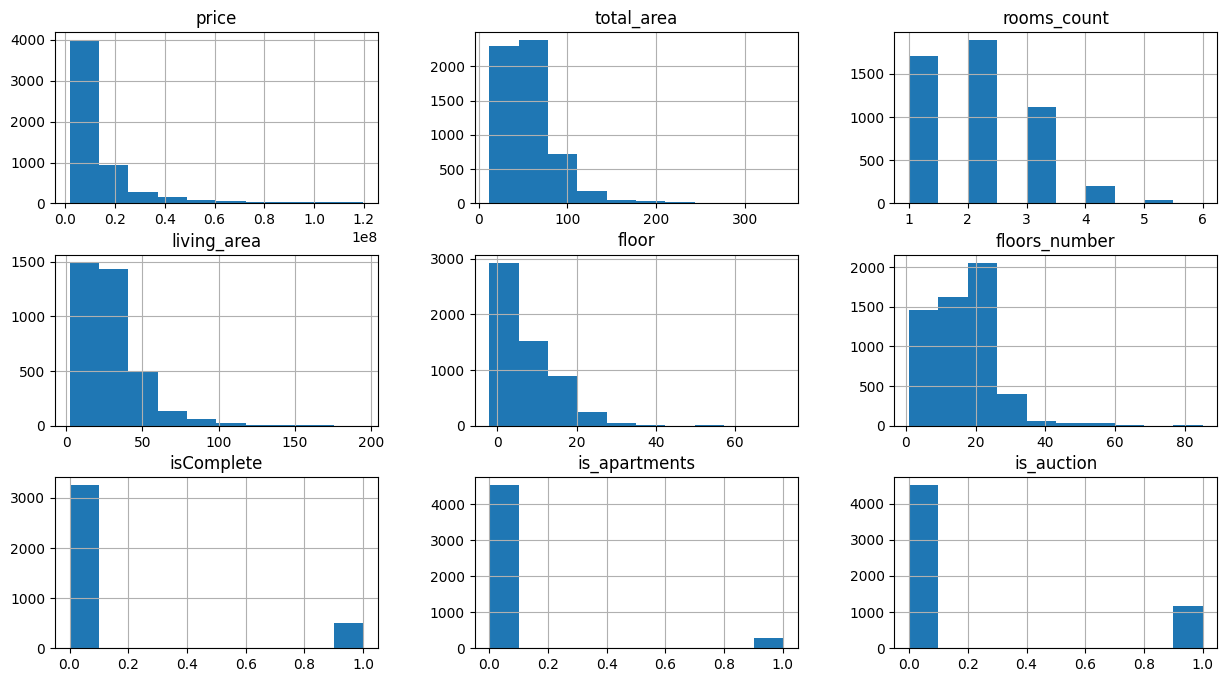

In [ ]:
df[selected_columns].hist(figsize=(15,8))

In [ ]:
most_frequent_value = df['floors_number'].mode()[0]
print(most_frequent_value)

25


In [ ]:
most_frequent_value = df['price'].value_counts().idxmax()

print(most_frequent_value)

5500000


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms_count'}>],
       [<Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_number'}>],
       [<Axes: title={'center': 'isСomplete'}>,
        <Axes: title={'center': 'is_apartments'}>,
        <Axes: title={'center': 'is_auction'}>]], dtype=object)

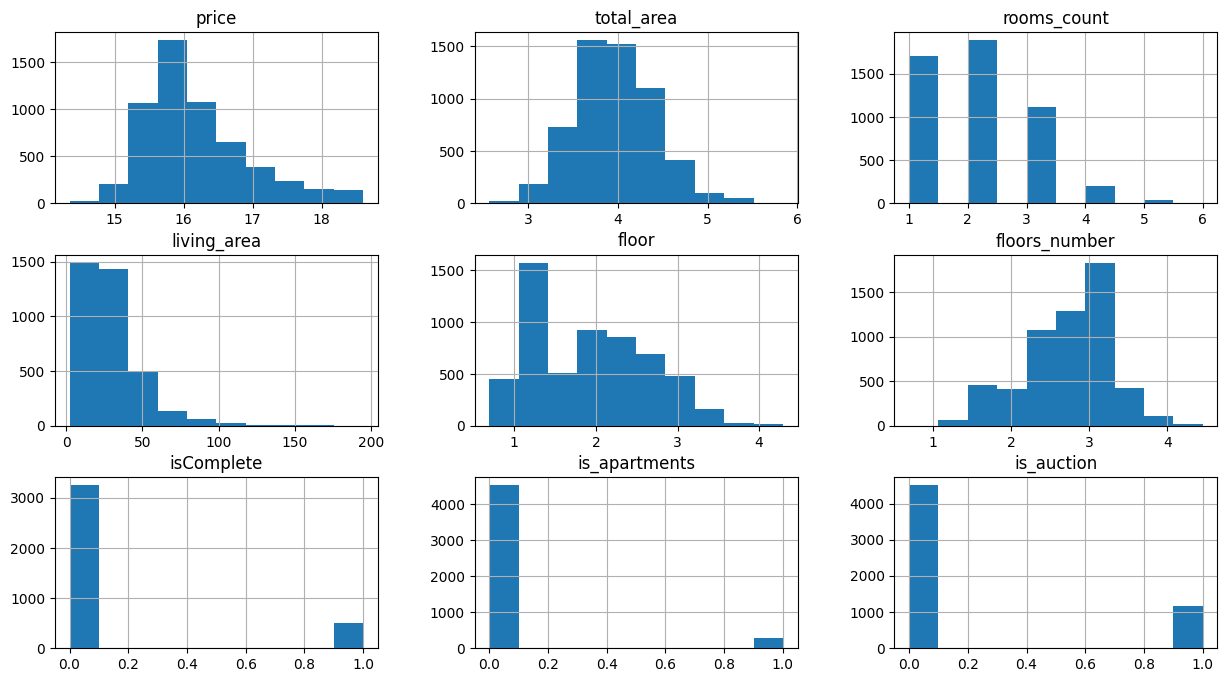

In [ ]:
df = df
df['price'] = np.log(df['price'] + 1)
df['total_area'] = np.log(df['total_area'] + 1)
df['floor'] = np.log(df['floor'] + 1)
df['floors_number'] = np.log(df['floors_number'] + 1)
df[selected_columns].hist(figsize=(15,8))

In [ ]:
result = pd.concat([df_msk, df_spb], axis=0)
result

,region,address,price,total_area,kitchen_area,living_area,rooms_count,floor,floors_number,build_date,isСomplete,complitation_year,house_material,parking,decoration,balcony,longitude,latitude,passenger_elevator,cargo_elevator,metro,metro_distance,metro_transport,district,is_apartments,is_auction
1,msk,"Москва, Самотечная ул., 5",66970000,160.00,25.0,119.0,3.0,3,9,1892.0,NaN,NaN,brick,underground,NaN,0.0,37.618318,55.775165,1.0,1.0,"Цветной бульвар,Достоевская,Сухаревская","6,9,13","walk,walk,walk","Тверской,ЦАО",NaN,1
3,msk,"Москва, М. Бронная ул., 32",110500000,110.50,15.0,61.0,3.0,2,6,1912.0,NaN,NaN,brick,ground,NaN,0.0,37.593524,55.764197,1.0,0.0,"Маяковская,Пушкинская,Тверская","10,10,10","walk,walk,walk","Пресненский,ЦАО",NaN,1
10,msk,"Москва, Софийская набережная, 36",109213650,127.00,NaN,NaN,3.0,3,7,NaN,1.0,2022.0,NaN,NaN,NaN,NaN,37.623959,55.747611,4.0,4.0,"Новокузнецкая,Третьяковская,Китай-город","11,11,15","walk,walk,walk","Якиманка,ЦАО",1.0,0
14,msk,"Москва, 1-я Тверская-Ямская улица, 2",85974000,62.30,23.7,NaN,2.0,8,9,NaN,1.0,2022.0,monolith,underground,fine,NaN,37.594868,55.771088,NaN,NaN,"Маяковская,Тверская,Пушкинская","1,10,11","walk,walk,walk","Тверской,ЦАО",1.0,0
18,msk,"Москва, Лужнецкая набережная",52569000,49.80,NaN,27.9,2.0,9,17,NaN,0.0,2026.0,monolith,multilevel,without,NaN,37.571184,55.715275,1.0,1.0,"Воробьёвы горы,Лужники,Спортивная","12,18,20","walk,walk,walk","Хамовники,ЦАО",0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,spb,"Санкт-Петербург, проспект Обуховской Обороны",9800152,32.61,10.8,14.1,1.0,1,9,NaN,0.0,2025.0,monolithBrick,NaN,fine,NaN,30.419831,59.905699,30.0,NaN,"Елизаровская,Площадь Александра Невского,Ломон...","18,4,5","walk,transport,transport","Невская застава,Невский",0.0,0
1996,spb,"Санкт-Петербург, жилой комплекс Аэронавт, 1",9782166,33.70,15.9,10.1,1.0,2,13,NaN,0.0,2025.0,monolith,open,fine,NaN,30.343916,59.903248,1.0,1.0,"Обводный канал,Фрунзенская,Звенигородская","18,6,6","walk,transport,transport","Волковское,Фрунзенский",0.0,0
1997,spb,"Россия, Санкт-Петербург, Купчинская улица, 6/4к1",9770000,65.10,9.6,42.4,3.0,5,9,1975.0,NaN,NaN,panel,ground,NaN,0.0,30.385146,59.841925,1.0,0.0,"Купчино,Дунайская,Звездная","4,5,5","transport,transport,transport","Георгиевский,Фрунзенский",0.0,0
1998,spb,"г Санкт-Петербург, ул Демьяна Бедного, д 26 к 3",9800000,69.10,6.1,42.6,3.0,1,9,1972.0,NaN,NaN,brick,NaN,NaN,NaN,30.385640,60.046248,1.0,NaN,Гражданский проспект,6,transport,"Северный,Калининский",NaN,0


<Axes: xlabel='longitude', ylabel='latitude'>

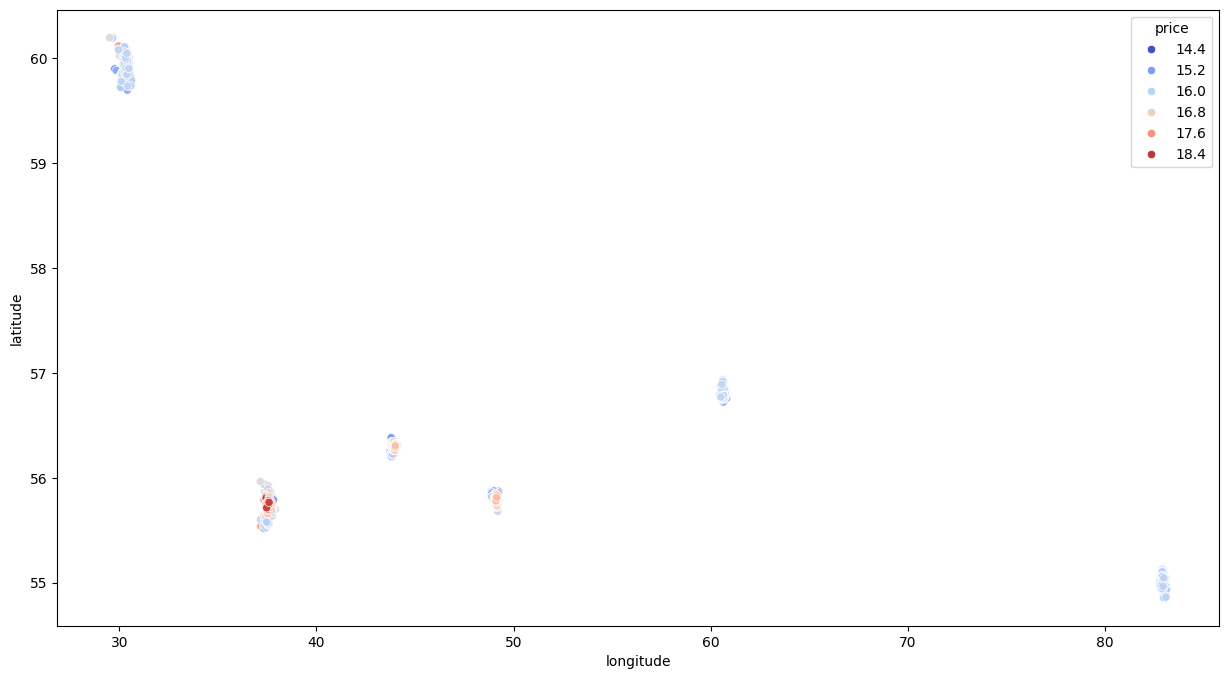

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude', y='latitude', data = df, hue='price', palette='coolwarm')

# Работа с данными


In [ ]:
df.columns.tolist()

['region',
 'address',
 'price',
 'total_area',
 'kitchen_area',
 'living_area',
 'rooms_count',
 'floor',
 'floors_number',
 'build_date',
 'isСomplete',
 'complitation_year',
 'house_material',
 'parking',
 'decoration',
 'balcony',
 'longitude',
 'latitude',
 'passenger_elevator',
 'cargo_elevator',
 'metro',
 'metro_distance',
 'metro_transport',
 'district',
 'is_apartments',
 'is_auction']

Удаляем лишние и добавляем нужное

In [ ]:
df = df.join(pd.get_dummies(df.region)).drop('region', axis=1)

In [ ]:
df = df.drop(columns = ['address',
 'house_material',
 'parking',
 'decoration',
 'metro',
 'metro_transport',
 'district', 'metro_distance'] )

In [ ]:
df = df[['total_area', 'floor', 'floors_number', 'longitude', 'latitude', 'is_auction', 'price']]

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.head()

,total_area,floor,floors_number,longitude,latitude,is_auction,price
1,5.081404,1.386294,2.302585,37.618318,55.775165,1,18.019755
3,4.714025,1.098612,1.945910,37.593524,55.764197,1,18.520526
10,4.852030,1.386294,2.079442,37.623959,55.747611,0,18.508817
14,4.147885,2.197225,2.302585,37.594868,55.771088,0,18.269555
18,3.927896,2.302585,2.890372,37.571184,55.715275,0,17.777637


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5677 entries, 1 to 5977
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_area     5677 non-null   float64
 1   floor          5677 non-null   float64
 2   floors_number  5677 non-null   float64
 3   longitude      5677 non-null   float64
 4   latitude       5677 non-null   float64
 5   is_auction     5677 non-null   int64  
 6   price          5677 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 354.8 KB


In [ ]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
train_data = X_train.join(y_train)

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, y_train = df.drop(["price"], axis=1), df["price"]

reg = LinearRegression()

reg.fit(X_train, y_train)



X_test, y_test = df.drop(["price"], axis=1), df["price"]

reg.score(X_test, y_test)
dump(reg, 'model_lr.joblib')

['model_lr.joblib']

In [ ]:
#from sklearn.ensemble import RandomForestRegressor

#forest = RandomForestRegressor()

#forest.fit(X_train, y_train)

In [ ]:
#forest.score(X_test, y_test)

In [ ]:
# Оценка модели

predict_LR = reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predict_LR))

rmse

0.3980569091846481

In [ ]:
# Запускаем утилиту wget для получения внешнего IP-адреса от сервиса ipv4.icanhazip.com

!wget -q -O - ipv4.icanhazip.com

34.73.18.128


In [ ]:
# Установка библиотек

!pip install streamlit -q

In [ ]:
# Запускает приложение streamlit (файл приложения app.py)

!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.18.128:8501

npx: installed 22 in 2.931s
your url is: https://stupid-hornets-begin.loca.lt


## Заполнение пропусков

### IsComplete

Заменить все колонки на возраст дома

In [ ]:
df['isСomplete'].isnull().sum()

In [ ]:
# Изучение пропусков в столбце isComplete (достроен ли дом)

df['isСomplete'].value_counts()

In [ ]:
# Заполнение пропусков в столбце isComplete

# Если дата постройки дома (build_date) < 2024, то дом построен
df.loc[df['build_date'].fillna(2025).astype(int) < 2024, 'isСomplete'] = 1
# Если дата окончания строительства (complitation_year) > 2024, то дом не построен
df.loc[df['complitation_year'].fillna(2023).astype(int) > 2024, 'isСomplete'] = 0

print('После:\n', df.isСomplete.value_counts())

In [ ]:
df['isСomplete'].isnull().sum()

### build_date

### complitation_year

### living_area

### rooms_count

### house_material

In [ ]:
key = df[df['house_material'].isna()]['address'].unique()
loa = list()
for item in key:
    loa.extend(df[df['address']==item].index)
    # print(df[df['address']==item].index)
len(loa)

In [ ]:
len(df[df['house_material'].isna()]['address'].index)
len(key)

### longitude and latitude

В градусах, широта Москвы примерно равна 55.75°, а долгота 37.62°.

### passenger_elevator и cargo_elevator

сложить и посмотреть зависит ли лифт от количества этажей

###

### metro

In [ ]:
df[df['metro'].isna()].shape

In [ ]:
aa = list(df['metro'].unique())
ll = list()
for item in aa:
    jj = str(item).split(',')
    ll.extend(jj)
print(f"разных сочетаний станций = {len(df['metro'].unique())}")
print(f"разных станций = {len(set(ll))}")

### metro_distance

### metro_transport

### district

In [ ]:
# все пропуски в районе расположены в городе новосибирск
# записей без пропуска с таким же адресом - нет
# смотрим в гугле какому району они принадлежат и пишем это

print(df[df['district'].isna()]['region'].unique())
print(df[df['district'].isna()]['address'].unique())

for key in df[df['district'].isna()]['address'].unique():
    print(df[df['address']==key][['address', 'district']])

### is_apartments

Смотрим квартиры в этом районе и ставим самое популярное значение

### is_auction

# Построение модели

In [ ]:
# Разделение выборки на трейн и тест

features = df.drop(['price'], axis=1)
target = df['price']

features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.1,
                                                                            random_state=42)

# Разделение признаков на численные и категориальные
features_train_cat = features_train[['region']]
features_test_cat = features_test[['region']]
features_train_num = features_train[['total_area', 'floor', 'floors_number', 'longitude', 'latitude', 'is_auction']]
features_test_num = features_test[['total_area', 'floor', 'floors_number', 'longitude', 'latitude', 'is_auction']]

In [ ]:
# Кодирование признаков

encoder = OneHotEncoder(sparse=False)
encoder.fit(features_train_cat)
dump(encoder, 'encoder.joblib')

features_train_encoded = pd.DataFrame(encoder.transform(features_train_cat),
                                      columns = encoder.get_feature_names_out(features_train_cat.columns))
features_test_encoded = pd.DataFrame(encoder.transform(features_test_cat),
                                     columns = encoder.get_feature_names_out(features_test_cat.columns))

features_train = pd.concat([features_train_encoded.reset_index(drop=True),
                            features_train_num.reset_index(drop=True)], axis=1)
features_test = pd.concat([features_test_encoded.reset_index(drop=True),
                           features_test_num.reset_index(drop=True)], axis=1)

In [ ]:
features_train.head()

In [ ]:
# Построение модели

model_LR = LinearRegression()
model_LR.fit(features_train, target_train)
dump(model_LR, 'model_lr.joblib')

$$\text{RMSE} = \sqrt{\frac{\sum_{i=1}^{n}(\hat{y}_i - y_i)^2}{n}}$$


In [ ]:
# Оценка модели

predict_LR = model_LR.predict(features_test)
rmse = sqrt(mean_squared_error(target_test, predict_LR))

rmse

# Веб-интерфейс


Streamlit - это библиотека для создания веб-приложений с использованием Python. Она позволяет быстро создавать интерактивные веб-интерфейсы для машинного обучения и анализа данных.

-q - это опция, которая указывает pip работать в тихом режиме, то есть не выводить подробную информацию о процессе установки.

In [ ]:
# Установка библиотек

!pip install streamlit -q
import streamlit as st

In [ ]:
total_area = 40
floor = 10
floors_number = 15
longitude = 49.14
latitude = 55.81
is_auction = 0
region = 'kzn'

model = joblib.load('model_lr.joblib')
encoder = joblib.load('encoder.joblib')

columns = ['region', 'total_area', 'floor', 'floors_number', 'longitude', 'latitude', 'is_auction']

def predict():
  row = np.array([region, total_area, floor, floors_number, longitude, latitude, is_auction])
  X = pd.DataFrame([row], columns=columns)
  # display(X)
  X_cat = X[['region']]
  X_num = X[['total_area', 'floor', 'floors_number', 'longitude', 'latitude', 'is_auction']]

  encoder = joblib.load('encoder.joblib')
  X_encoded = pd.DataFrame(encoder.transform(X_cat),
                           columns = encoder.get_feature_names_out(X_cat.columns))

  X = pd.concat([X_encoded.reset_index(drop=True),
                 X_num.reset_index(drop=True)], axis=1)

  return model.predict(X)[0]


predict()

In [ ]:
# Запускаем утилиту wget для получения внешнего IP-адреса от сервиса ipv4.icanhazip.com

!wget -q -O - ipv4.icanhazip.com

In [ ]:
# Запускает приложение streamlit (файл приложения app.py)

!streamlit run app.py & npx localtunnel --port 8501

In [ ]:
# Перенести в файл app.py перед запуском streamlit

import joblib
import numpy as np
import pandas as pd
import streamlit as st
from joblib import dump

model = joblib.load('model_lr.joblib')
encoder = joblib.load('encoder.joblib')

st.title('Предсказание цены на недвижимость')

region = st.selectbox('Регион', ('msk', 'spb', 'ekb', 'nsk', 'kzn', 'nng'))
total_area = st.number_input('Площадь, кв.м.')
floor = st.number_input('Этаж')
floors_number = st.number_input('Кол-во этажей в доме')
longitude = st.number_input('Долгота, град')
latitude = st.number_input('Широта, град')
is_auction = st.number_input('Находится ли квартира на аукционе?')

columns = ['region', 'total_area', 'floor', 'floors_number',
           'longitude', 'latitude', 'is_auction']

def predict():
  row = np.array([region, total_area, floor, floors_number, longitude, latitude, is_auction])
  X = pd.DataFrame([row], columns=columns)
  X_cat = X[['region']]
  X_num = X[['total_area', 'floor', 'floors_number', 'longitude', 'latitude', 'is_auction']]

  encoder = joblib.load('encoder.joblib')
  X_encoded = pd.DataFrame(encoder.transform(X_cat),
                           columns = encoder.get_feature_names_out(X_cat.columns))

  X = pd.concat([X_encoded.reset_index(drop=True),
                 X_num.reset_index(drop=True)], axis=1)

  return model.predict(X)[0]


if st.button("Предсказание"):
    st.success(predict())